In [1]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 716.2/716.2 kB 6.8 MB/s eta 0:00:00


In [4]:
from ultralytics import YOLO

model = YOLO("yolov8s.pt")
results = model("./bus.jpg")
plots = results[0].plot()


image 1/1 /content/bus.jpg: 640x480 4 persons, 1 bus, 630.7ms
Speed: 18.8ms preprocess, 630.7ms inference, 32.8ms postprocess per image at shape (1, 3, 640, 480)


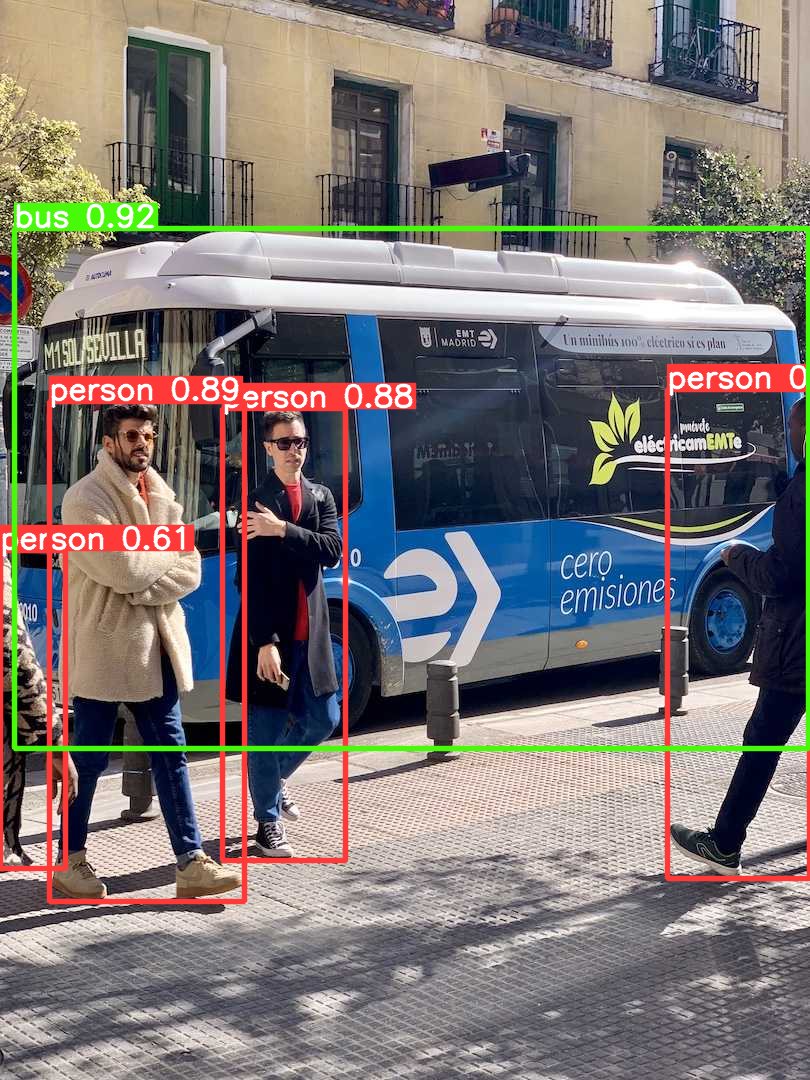

In [5]:
from google.colab.patches import cv2_imshow
img = results[0].plot()
cv2_imshow(img)


image 1/1 /content/zidane.jpg: 384x640 2 persons, 1 tie, 635.8ms
Speed: 2.6ms preprocess, 635.8ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)


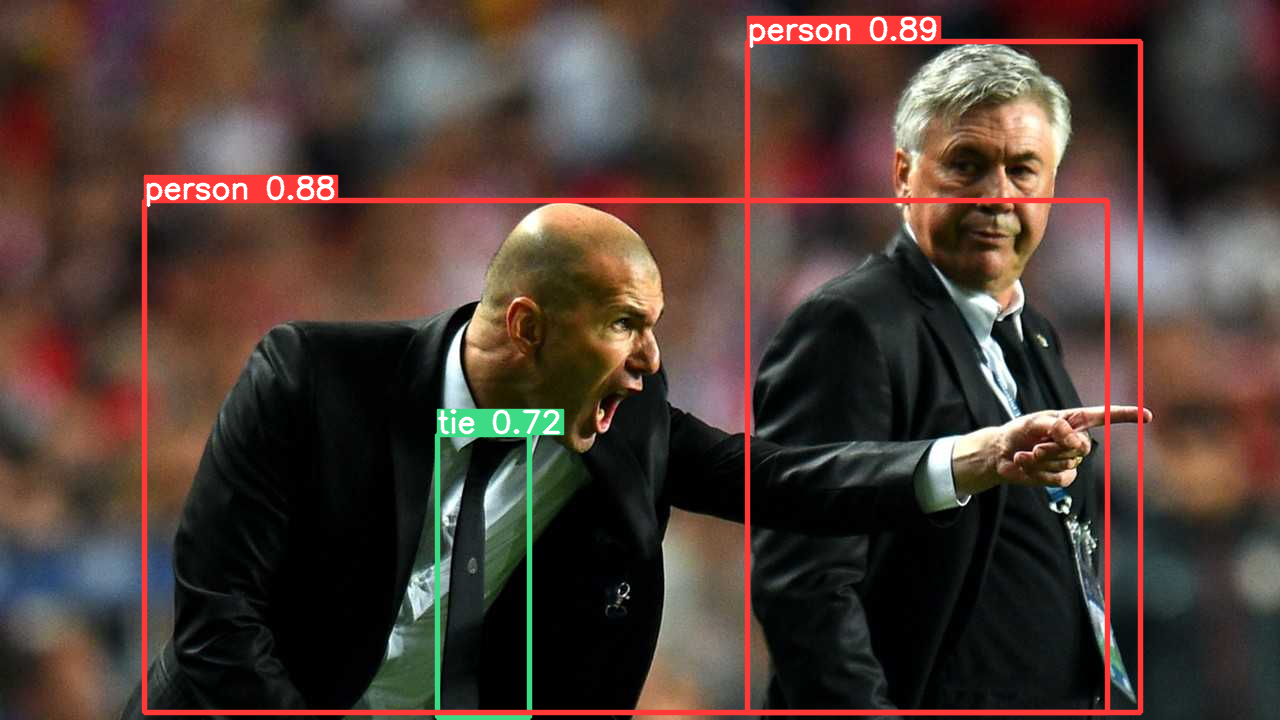

In [6]:
results = model("./zidane.jpg")
plots = results[0].plot()
img = results[0].plot()
cv2_imshow(img)

In [15]:
import cv2

In [7]:
results[0].boxes

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([ 0.,  0., 27.])
conf: tensor([0.8891, 0.8845, 0.7178])
data: tensor([[7.4731e+02, 4.1473e+01, 1.1404e+03, 7.1292e+02, 8.8908e-01, 0.0000e+00],
        [1.4488e+02, 2.0003e+02, 1.1072e+03, 7.1270e+02, 8.8448e-01, 0.0000e+00],
        [4.3738e+02, 4.3448e+02, 5.2996e+02, 7.1705e+02, 7.1779e-01, 2.7000e+01]])
id: None
is_track: False
orig_shape: (720, 1280)
shape: torch.Size([3, 6])
xywh: tensor([[943.8527, 377.1985, 393.0789, 671.4503],
        [626.0361, 456.3664, 962.3223, 512.6671],
        [483.6702, 575.7658,  92.5807, 282.5707]])
xywhn: tensor([[0.7374, 0.5239, 0.3071, 0.9326],
        [0.4891, 0.6338, 0.7518, 0.7120],
        [0.3779, 0.7997, 0.0723, 0.3925]])
xyxy: tensor([[ 747.3132,   41.4733, 1140.3921,  712.9236],
        [ 144.8750,  200.0328, 1107.1973,  712.7000],
        [ 437.3798,  434.4805,  529.9606,  717.0511]])
xyxyn: tensor([[0.5838, 0.0576, 0.8909, 0.9902],
        [0.1132, 0.2778, 0.8650, 0.98

In [17]:
results[0].boxes[0]

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([0.])
conf: tensor([0.8891])
data: tensor([[7.4731e+02, 4.1473e+01, 1.1404e+03, 7.1292e+02, 8.8908e-01, 0.0000e+00]])
id: None
is_track: False
orig_shape: (720, 1280)
shape: torch.Size([1, 6])
xywh: tensor([[943.8527, 377.1985, 393.0789, 671.4503]])
xywhn: tensor([[0.7374, 0.5239, 0.3071, 0.9326]])
xyxy: tensor([[ 747.3132,   41.4733, 1140.3921,  712.9236]])
xyxyn: tensor([[0.5838, 0.0576, 0.8909, 0.9902]])

In [25]:
persons = []
for idx, cls in enumerate(results[0].boxes.cls):
  if cls == 0:
    persons.append(idx)

persons

[0, 1]

In [111]:
p_data = [results[0].boxes[x].data for x in persons]
p_boxes = [results[0].boxes[x].xyxy[0] for x in persons]
p_data, p_boxes

([tensor([[7.4731e+02, 4.1473e+01, 1.1404e+03, 7.1292e+02, 8.8908e-01, 0.0000e+00]]),
  tensor([[1.4488e+02, 2.0003e+02, 1.1072e+03, 7.1270e+02, 8.8448e-01, 0.0000e+00]])],
 [tensor([ 747.3132,   41.4733, 1140.3921,  712.9236]),
  tensor([ 144.8750,  200.0328, 1107.1973,  712.7000])])

In [82]:
float(p_boxes[0][0][0]), p_boxes[0][0][1]

(747.313232421875, tensor(41.4733))

In [113]:
p_boxes[0][1].item()

41.47332763671875

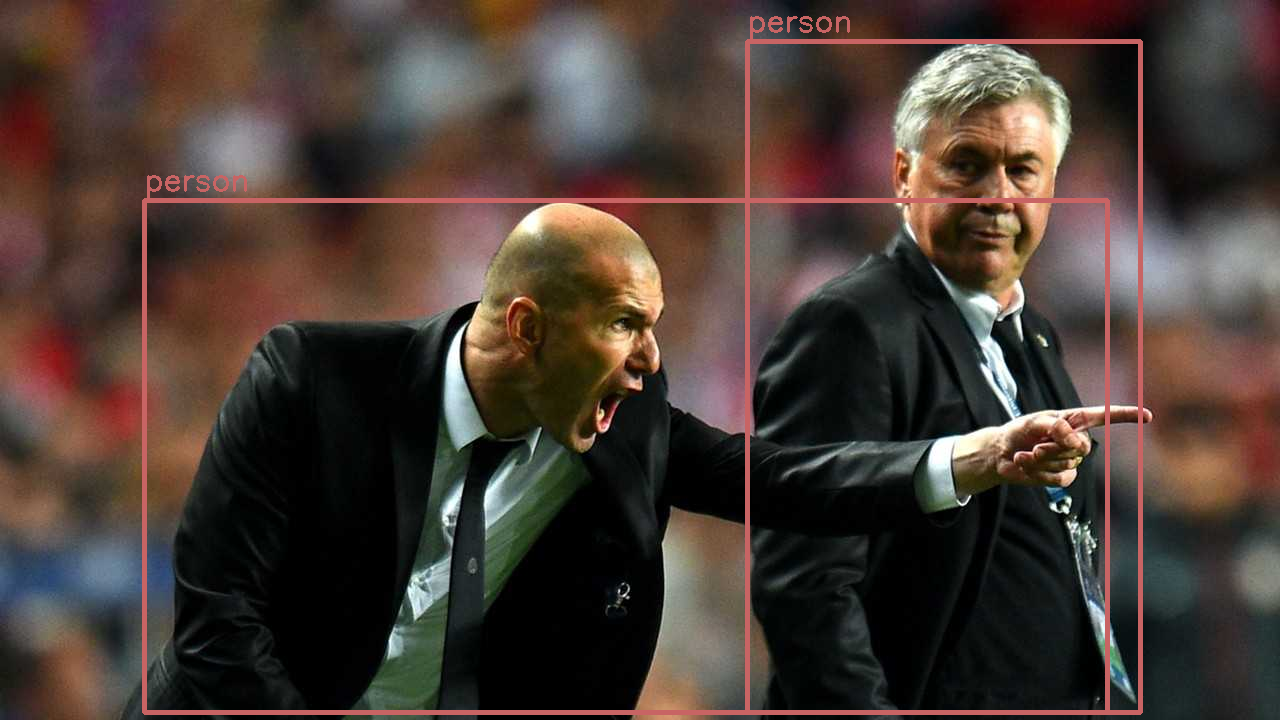

In [131]:
img = cv2.imread('zidane.jpg')
for rec in p_boxes:
  text = results[0].names[0]
  pt1 = int(rec[0].item()), int(rec[1].item())
  pt2 = int(rec[2].item()), int(rec[3].item())
  img = cv2.rectangle(img, pt1, pt2, (100, 100, 200), 3)
  img = cv2.putText(img, text, (int(rec[0].item()), int(rec[1].item()-10)), cv2.FONT_HERSHEY_SIMPLEX, 1, (100, 100, 200), 2)

cv2_imshow(img)